# Analizar Dados Empresas

## Imports

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Metodos

### Convert Tipo Dados

In [161]:
def convert_data_types(df):
    """
    Converts columns in a DataFrame to appropriate data types.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with converted data types.
    """

    for col in df.columns:
        try:
            # Check for integers
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col] = pd.to_numeric(df[col], errors='coerce')
            # Check for floats
            elif re.search(r"^\d+\.\d+$", str(df[col].iloc[0])):  # Check first value for pattern
                df[col] = pd.to_numeric(df[col], errors='coerce')
            # Check for dates (basic format)
            elif re.search(r"^\d{4}-\d{2}-\d{2}$", str(df[col].iloc[0])):
                df[col] = pd.to_datetime(df[col], errors='coerce')
            # Keep strings as strings
            else:
                df[col] = df[col].astype(str)
        except:
            # Handle potential errors during conversion
            pass

    return df


## Preparar Dados

In [162]:
caminho_dados_b3 = '../dados/dados_acoes_empresas_b3.csv'
dados_b3 = pd.read_csv(caminho_dados_b3, sep=';')

In [163]:
#Converte tipos dos dados
dados_b3 = convert_data_types(dados_b3)
#Campos Fundamentação Ações
fundamentos_b3 = dados_b3[['symbol', 'longName','sector','industry', 'trailingPE', 'priceToBook', 'returnOnEquity', 'profitMargins', 'debtToEquity', 'dividendYield']]

### Tratar Valores Nulos

In [164]:
# Remover linhas com valores nulos em colunas essenciais
fundamentos_b3 = fundamentos_b3.dropna(subset=['symbol', 'longName', 'sector', 'industry'])
# Substituindo todos os valores infinitos por NaN
fundamentos_b3.replace([np.inf, -np.inf], np.nan, inplace=True)

# Substituir valores nulos com a mediana para métricas financeiras
colunas_para_mediana = ['trailingPE', 'priceToBook', 'returnOnEquity', 'profitMargins', 'debtToEquity']
for coluna in colunas_para_mediana:
    fundamentos_b3[coluna] = fundamentos_b3[coluna].fillna(fundamentos_b3[coluna].median())

# Substituir valores nulos no Dividend Yield com 0 (assumindo que seja para empresas que não pagam dividendos)
fundamentos_b3['dividendYield'] = fundamentos_b3['dividendYield'].fillna(0)

### Calcular Estatísticas Descritivas

In [165]:

# Verificar valores únicos em uma coluna específica (por exemplo, 'trailingPE')
print(fundamentos_b3['trailingPE'].unique())

# Substituir NaN por um valor específico (se necessário)
fundamentos_b3.fillna(0, inplace=True)  # Substitui todos os NaN por 0

# Verificar valores nulos
print(fundamentos_b3.isnull().sum())

# Recalcular estatísticas e percentis
estatisticas_descritivas = fundamentos_b3.describe()
percentis = fundamentos_b3[['trailingPE', 'priceToBook', 'returnOnEquity',  'profitMargins',  'debtToEquity',  'dividendYield']].quantile([0.25, 0.5, 0.75])

print(estatisticas_descritivas)
print(percentis)

[8.76256900e+00 1.67200000e+01 1.33589750e+01 1.41318670e+01
 5.16000000e+02 1.42083320e+01 5.75841900e+00 7.92086360e+00
 4.78225800e+00 6.01036300e+00 9.82978700e+00 3.56666640e+01
 7.61538400e+00 1.51951220e+01 1.91020400e+01 4.07781000e+00
 6.26666680e+01 1.88857150e+01 1.62531640e+01 1.51449270e+01
 2.93457940e+00 1.59259250e+01 2.84013600e+01 1.88864860e+01
 9.59999900e+00 2.25625000e+01 6.72619060e+00 7.72803300e+00
 2.02450980e+01 4.62748600e+00 1.76800000e+01 1.20512830e+01
 3.33250000e+01 1.76666660e+01 6.25438550e+00 7.07324800e+00
 1.32068970e+01 6.98505200e+00 6.22485200e+00 1.34631580e+01
 1.91452520e+01 2.00000000e+01 1.07676980e+01 1.62596500e+01
 9.04296900e+00 1.18955220e+01 2.64285740e+02 4.48709680e+01
 3.85179860e+01 1.36956520e+01 1.33949570e+01 8.62028300e+00
 5.49287750e+00 8.70149200e+00 1.48264470e+01 1.11758240e+01
 6.35833300e+00 1.54689660e+01 1.41428580e+01 5.07453400e+00
 7.90123400e-04 2.13500000e+01 1.16694210e+01 1.81005690e+01
 1.31105530e+01 5.034483

### Analisar por Setor e Indústria

In [166]:
# Agrupar por setor e calcular médias
media_por_setor = fundamentos_b3.groupby('sector').mean(numeric_only=True)
print(media_por_setor)

# Agrupar por indústria e calcular médias
media_por_industria = fundamentos_b3.groupby('industry').mean(numeric_only=True)
print(media_por_industria)

# Opcional: Calcular medianas por setor e indústria
mediana_por_setor = fundamentos_b3.groupby('sector').median(numeric_only=True)
print(mediana_por_setor)

mediana_por_industria = fundamentos_b3.groupby('industry').median(numeric_only=True)
print(mediana_por_industria)


                        trailingPE  priceToBook  returnOnEquity  \
sector                                                            
Basic Materials          29.694104    12.329391       -0.185394   
Communication Services   13.705958     1.218760        0.089325   
Consumer Cyclical        16.149235     1.314994        0.047354   
Consumer Defensive       16.685531     1.586687        0.058026   
Energy                    7.553954     1.358682        0.176281   
Financial Services        8.723141     1.370501        0.169053   
Healthcare               13.327745     1.664805        0.029476   
Industrials              13.300654     1.788278        0.045829   
Real Estate               9.746080     1.204660        0.060750   
Technology               10.883185     1.334039        0.008002   
Utilities                10.283190     1.867115        0.296156   

                        profitMargins  debtToEquity  dividendYield  
sector                                                     

###  Visualizar Dados - ROE por Setor

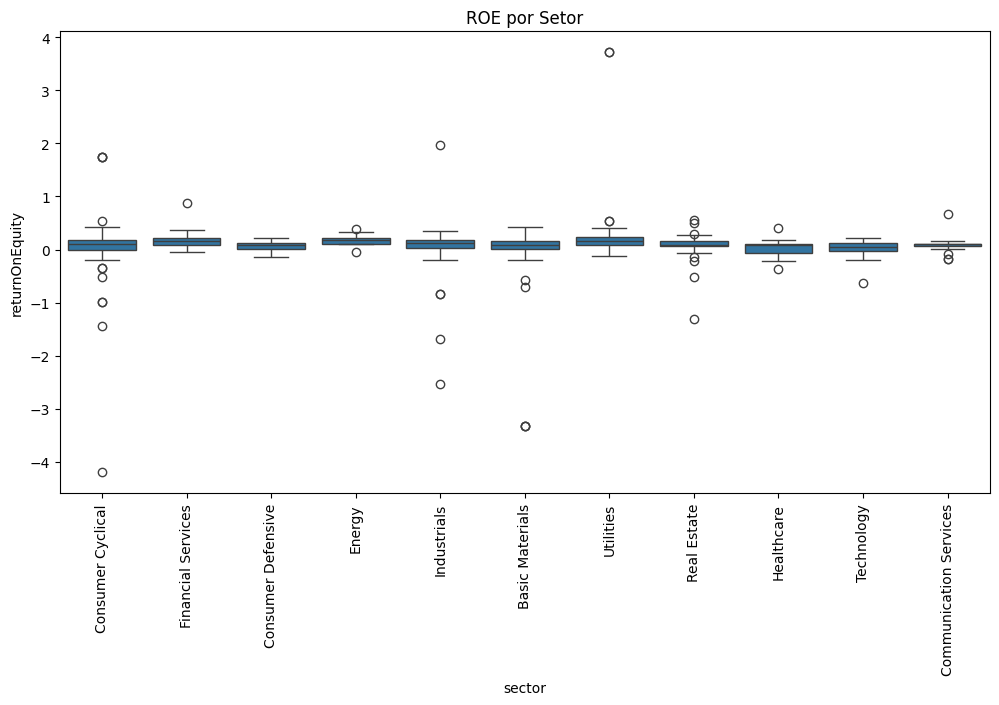

In [167]:
# Exemplo: Boxplot para ROE por setor
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='returnOnEquity', data=fundamentos_b3)
plt.xticks(rotation=90)
plt.title('ROE por Setor')
plt.show()

## Armazenar Dados

In [168]:
caminho_fundamentos = '../dados/fundamentos_b3.csv'
fundamentos_b3.to_csv(caminho_fundamentos, sep=';')